## The goal of this challenge is to build a model that predicts conversion rate and, based on the model, come up with ideas to improve it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the data

In [2]:
data=pd.read_csv("https://drive.google.com/uc?export=download&id=1KvxyyF3QCtvIx0J7_8iWDEtFQpLgd0Yq")

## Exploratory Data Analysis

### General overview of data

In [3]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


### Checking for conversion rate for category variables

In [6]:
source_conversion = list(data.groupby(['source'])['converted'].mean())
source = list(data.groupby(['source'])['converted'].mean().index)
data.groupby(['source'])['converted'].mean()

source
Ads       0.034483
Direct    0.028169
Seo       0.032895
Name: converted, dtype: float64

In [7]:
country_conversion = list(data.groupby(["country"])["converted"].mean())
country = list(data.groupby(["country"])["converted"].mean().index)
data.groupby(["country"])["converted"].mean()

country
China      0.001332
Germany    0.062500
UK         0.052632
US         0.037801
Name: converted, dtype: float64

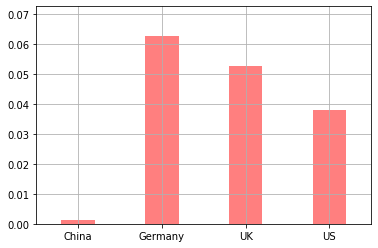

In [8]:
loc = [1,3,5,7]
plt.bar(loc,country_conversion,color="r",alpha=0.5)
plt.xticks(loc,country)
plt.xlim([0,8])
plt.ylim([0,max(country_conversion)+0.01])
plt.grid()

## Feature Engineering

### Data Cleaning

In [9]:
data["age"].describe()

count    316200.000000
mean         30.569858
std           8.271802
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max         123.000000
Name: age, dtype: float64

In [10]:
data = data[data["age"]<110]

In [11]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


### One-hot encoding

In [12]:

data_dummy = pd.concat([data,pd.DataFrame(pd.get_dummies(data["source"],prefix = "source")), \
                       pd.get_dummies(data["country"],prefix = "country")],axis=1)
data_dummy.drop(["country"],axis=1,inplace=True)
data_dummy.drop(["source"],axis=1,inplace=True)
data_dummy.drop(["converted"],axis=1,inplace=True)
data_dummy = pd.concat([data_dummy,data["converted"]],axis=1)

In [13]:
data_dummy.head()

,age,new_user,total_pages_visited,source_Ads,source_Direct,source_Seo,country_China,country_Germany,country_UK,country_US,converted
0,25,1,1,1,0,0,0,0,1,0,0
1,23,1,5,0,0,1,0,0,0,1,0
2,28,1,4,0,0,1,0,0,0,1,0
3,39,1,5,0,0,1,1,0,0,0,0
4,30,1,6,0,0,1,0,0,0,1,0


## PCA

In [14]:
from sklearn.decomposition import PCA
# Default: n_components == min(n_samples, n_features) - 1
data_x = data_dummy.iloc[:,:-1]
data_y = data_dummy.iloc[:,-1:]
pca = PCA(n_components = 10)
pca.fit(data_x)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
# components_array, shape (n_components, n_features)
pca.components_

array([[ 9.99752167e-01,  7.42331616e-04, -2.22434042e-02,
        -1.48671996e-04, -3.92968287e-07,  1.49064964e-04,
         3.93518238e-04, -8.06109057e-05, -2.78588819e-04,
        -3.43185131e-05],
       [ 2.22535480e-02, -1.16239209e-02,  9.99649405e-01,
         6.61340699e-04, -1.18003949e-03,  5.18698790e-04,
        -7.06269943e-03,  1.16754561e-03,  2.87383757e-03,
         3.02131625e-03],
       [ 2.06546448e-04,  2.10782889e-03,  3.17095423e-04,
         5.23921572e-01,  2.80203886e-01, -8.04125457e-01,
        -1.01220925e-02, -7.60541282e-04, -4.74155025e-03,
         1.56241841e-02],
       [-6.30098368e-05,  1.61248658e-02,  5.92454015e-03,
         1.40866255e-02,  4.13665306e-04, -1.45002908e-02,
         5.59001049e-01,  3.64236292e-02,  2.06381846e-01,
        -8.01806524e-01],
       [-4.10703107e-05,  2.39671071e-03,  1.43577798e-03,
        -6.26066987e-01,  7.66896654e-01, -1.40829667e-01,
         1.71478314e-03, -1.99129669e-03,  5.70169342e-03,
        -5.

## K-means

In [16]:
from sklearn.cluster import KMeans


## Modeling

### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:

train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,test_size=0.3,random_state = 0)

In [19]:
np.ravel(train_y)

array([1, 0, 0, ..., 0, 0, 0])

In [20]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(train_x,np.ravel(train_y))
log_predict = logistic_model.predict(test_x)
log_predict_prob = logistic_model.predict_proba(test_x)

logistic_model.score(test_x,test_y)

0.9860742146320894

### Cross Validation

#### Simple cross validation

In [21]:
from sklearn.model_selection import cross_validate
logistic_model = LogisticRegression(max_iter=1000)
data_x_cv = data_x
data_y_cv = data_y
cv_results = cross_validate(logistic_model,data_x_cv,np.ravel(data_y_cv),cv=10)

In [25]:
cv_results["test_score"]

array([0.98719165, 0.98545225, 0.98640101, 0.98545225, 0.98681214,
       0.98529412, 0.98684377, 0.98570525, 0.98608432, 0.98655871])

#### Cross validation to store model and parameters

In [26]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = False)
model_list = []
model_results = []
for train_index, test_index in kf.split(data_x_cv):
    x_train_tmp = data_x_cv.iloc[train_index,:]
    x_test_tmp = data_x_cv.iloc[test_index,:]
    y_train_tmp = data_y_cv.iloc[train_index,:]
    y_test_tmp = data_y_cv.iloc[test_index,:]
    lg_model_tmp = LogisticRegression(max_iter = 1000)
    lg_model_tmp.fit(x_train_tmp,np.ravel(y_train_tmp))
    model_list.append(lg_model_tmp)
    score_tmp = lg_model_tmp.score(x_test_tmp,y_test_tmp)
    model_results.append(score_tmp)

#### GridSearch 

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
parameters = {"C":list(np.linspace(0.1,1,10))}
logistic_model = LogisticRegression(max_iter = 1000)
logistic_GridSearch = GridSearchCV(logistic_model,parameters)
logistic_GridSearch.fit(train_x,np.ravel(train_y))

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,
                               0.7000000000000001, 0.8, 0.9, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
logistic_GridSearch.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [30]:
logistic_GridSearch.cv_results_["mean_test_score"]

array([0.98620662, 0.98622017, 0.98621566, 0.98622017, 0.98621566,
       0.9862021 , 0.9862021 , 0.9862021 , 0.98620662, 0.98621114])

In [31]:
logistic_GridSearch.cv_results_["rank_test_score"]

array([ 7,  1,  3,  2,  4, 10,  8,  8,  6,  5], dtype=int32)

In [32]:
## 坐标下降，调优

### ROC curve & AUC value

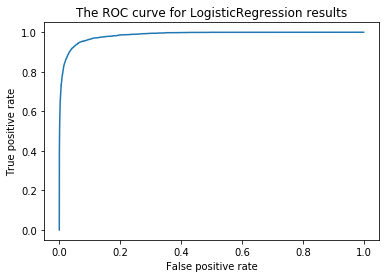

In [33]:
# Plot the ROC curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve
# To get a smooth line, use the predicted probability
fpr, tpr, threshold = roc_curve(test_y, log_predict_prob[:, 1])
x = fpr # false_positive_rate x-axis
y = tpr # true_positive_rate y-axis

# This is the ROC curve
plt.plot(x,y)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("The ROC curve for LogisticRegression results")
plt.show()

# This is the AUC
auc = np.trapz(y,x)

In [34]:
# Compute the AUC value
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y, log_predict_prob[:, 1])


0.9857761566232712

In [35]:
# Compute the AUC value
from sklearn.metrics import auc
auc(fpr,tpr)

0.9857761566232712

### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(bootstrap = True)
rf_classifier.fit(train_x,np.ravel(train_y))
rf_classifier.score(test_x,test_y)

0.9846194391735189

### GridSearch for RandomForest

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
# import scikitplot as skplt
# import matplotlib.pyplot as plt

# y_true = # ground truth labels
# y_probas = # predicted probabilities generated by sklearn classifier
# skplt.metrics.plot_roc_curve(y_true, y_probas)
# plt.show()